<a href="https://colab.research.google.com/github/nickwinters1/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

patient_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',header=None,names=['Age','Year_of_Operation','Positive_Axillary_Nodes_Detected','Survival_Status'])
patient_data['Survival_Status'].replace([1,2],[1,0],inplace=True)  
print(patient_data.count())
print(patient_data.isna().sum())
patient_data.head(306)

Age                                 306
Year_of_Operation                   306
Positive_Axillary_Nodes_Detected    306
Survival_Status                     306
dtype: int64
Age                                 0
Year_of_Operation                   0
Positive_Axillary_Nodes_Detected    0
Survival_Status                     0
dtype: int64


,Age,Year_of_Operation,Positive_Axillary_Nodes_Detected,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [0]:
#For Survival Status: 1 = the patient survived 5 years or longer    2 = the patient died within 5 year

In [129]:
patient_data.index

RangeIndex(start=0, stop=306, step=1)

In [130]:
patient_data.isnull().values.any()

False

In [0]:
#I can confirm there are no missing values and all observations are present

In [132]:
patient_data.head(5)

,Age,Year_of_Operation,Positive_Axillary_Nodes_Detected,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

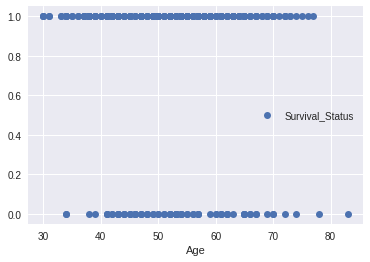

In [133]:
patient_data.plot(x='Age', y='Survival_Status', style='o')
#Comparing Age to Survial status does not work, they are similar, besides the one person who is above the age of 80

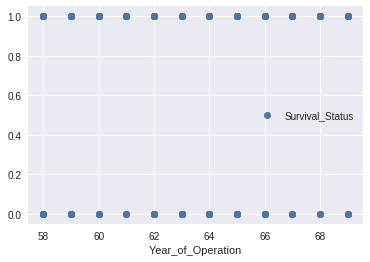

In [134]:
patient_data.plot(x='Year_of_Operation', y='Survival_Status', style='o')
#Comparing year of operation to survival status is identical not making it a good comparison 

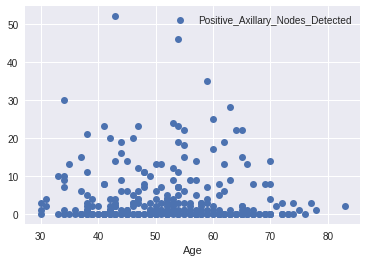

In [135]:
patient_data.plot(x='Age', y='Positive_Axillary_Nodes_Detected', style='o')

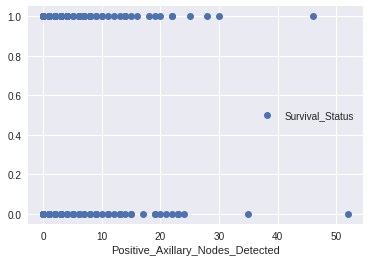

In [136]:
patient_data.plot(x='Positive_Axillary_Nodes_Detected', y='Survival_Status', style='o')

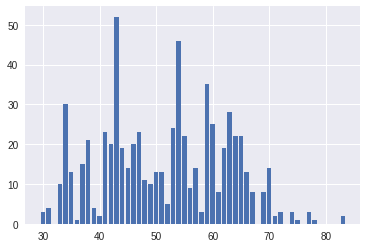

In [137]:
plt.bar(patient_data['Age'],patient_data['Positive_Axillary_Nodes_Detected']);

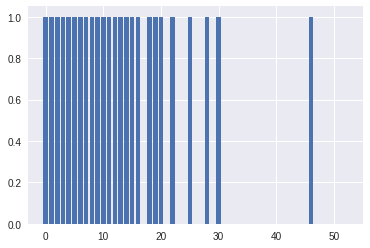

In [138]:
plt.bar(patient_data['Positive_Axillary_Nodes_Detected'],patient_data['Survival_Status']);

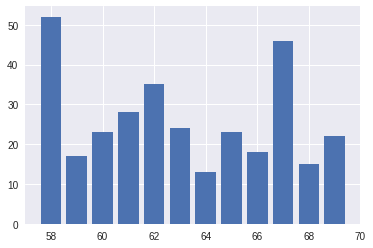

In [139]:
plt.bar(patient_data['Year_of_Operation'],patient_data['Positive_Axillary_Nodes_Detected']);

In [140]:
pd.crosstab(patient_data.Age,patient_data.Survival_Status,normalize='index')

Survival_Status,0,1
Age,,
30,0.000000,1.000000
31,0.000000,1.000000
33,0.000000,1.000000
34,0.285714,0.714286
35,0.000000,1.000000
36,0.000000,1.000000
37,0.000000,1.000000
38,0.100000,0.900000
39,0.166667,0.833333


In [141]:
pd.crosstab(patient_data.Year_of_Operation,patient_data.Survival_Status,normalize='index')


Survival_Status,0,1
Year_of_Operation,,
58,0.333333,0.666667
59,0.333333,0.666667
60,0.142857,0.857143
61,0.115385,0.884615
62,0.304348,0.695652
63,0.266667,0.733333
64,0.258065,0.741935
65,0.464286,0.535714
66,0.214286,0.785714


In [142]:
pd.crosstab(patient_data.Positive_Axillary_Nodes_Detected,patient_data.Survival_Status,normalize='index')

Survival_Status,0,1
Positive_Axillary_Nodes_Detected,,
0,0.139706,0.860294
1,0.195122,0.804878
2,0.250000,0.750000
3,0.350000,0.650000
4,0.230769,0.769231
5,0.666667,0.333333
6,0.428571,0.571429
7,0.285714,0.714286
8,0.285714,0.714286


In [143]:
pd.crosstab(patient_data.Positive_Axillary_Nodes_Detected,patient_data.Survival_Status,margins=True)

Survival_Status,0,1,All
Positive_Axillary_Nodes_Detected,,,
0,19,117,136
1,8,33,41
2,5,15,20
3,7,13,20
4,3,10,13
5,4,2,6
6,3,4,7
7,2,5,7
8,2,5,7


In [144]:
node_bins = pd.cut(patient_data['Positive_Axillary_Nodes_Detected'], 5)  
pd.crosstab(patient_data['Survival_Status'], node_bins)

Positive_Axillary_Nodes_Detected,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
Survival_Status,,,,,
0,58,15,6,1,1
1,208,11,5,0,1


In [145]:
pd.crosstab(patient_data['Survival_Status'], node_bins, normalize='columns')

Positive_Axillary_Nodes_Detected,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
Survival_Status,,,,,
0,0.218045,0.576923,0.545455,1.0,0.5
1,0.781955,0.423077,0.454545,0.0,0.5


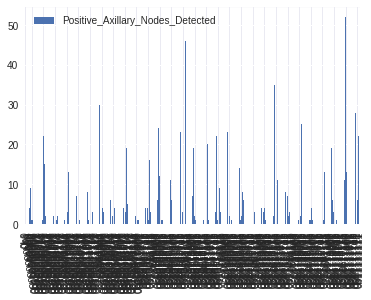

In [146]:
pd.pivot_table(
    patient_data, values='Positive_Axillary_Nodes_Detected', index=bin).plot.bar();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f858be357b8>,
      dtype=object)

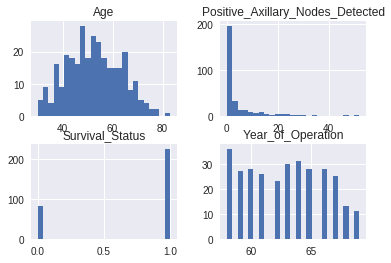

In [147]:
patient_data.hist(bins=25)

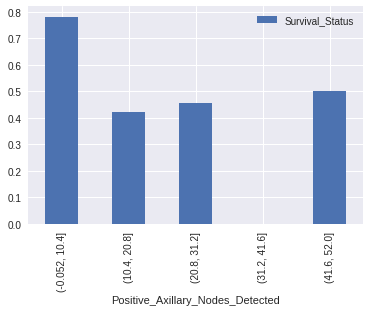

In [148]:
pd.pivot_table(patient_data, values='Survival_Status',
               index=node_bins).plot.bar()

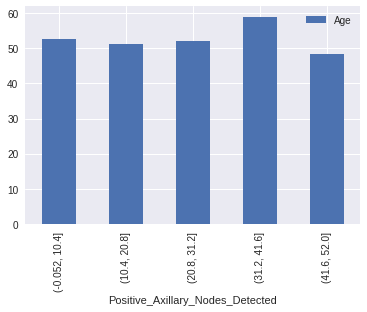

In [149]:
pd.pivot_table(patient_data, values='Age',
               index=node_bins).plot.bar()

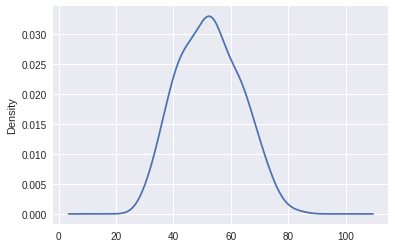

In [150]:
patient_data['Age'].plot.density()

In [151]:
ct = pd.crosstab(node_bins, [patient_data['Survival_Status'], patient_data['Age']],
                 normalize='columns')
print(type(ct))
ct

<class 'pandas.core.frame.DataFrame'>


Survival_Status                     0                                          \
Age                                30   31   33   34   35   36   37   38   39   
Positive_Axillary_Nodes_Detected                                                
(-0.052, 10.4]                    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
(10.4, 20.8]                      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
(20.8, 31.2]                      0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
(31.2, 41.6]                      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
(41.6, 52.0]                      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

Survival_Status                       ...     1                                \
Age                                40 ...    70   71   72   73   74   75   76   
Positive_Axillary_Nodes_Detected      ...                                       
(-0.052, 10.4]                    0.0 ...   0.8  1.0  1.0  1.0  1.0  1.0  1.0   
(10.4, 20.8]                      0.0 ...   0.2  0.0  0.0  0.0  0.0  0.0  0.0   
(20.8, 31.2]                      0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
(31.2, 41.6]                      0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
(41.6, 52.0]                      0.0 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

Survival_Status                                  
Age                                77   78   83  
Positive_Axillary_Nodes_Detected                 
(-0.052, 10.4]                    1.0  0.0  0.0  
(10.4, 20.8]                      0.0  0.0  0.0  
(20.8, 31.2]                      0.0  0.0  0.0  
(31.2, 41.6]                      0.0  0.0  0.0  
(41.6, 52.0]                      0.0  0.0  0.0  

[5 rows x 98 columns]

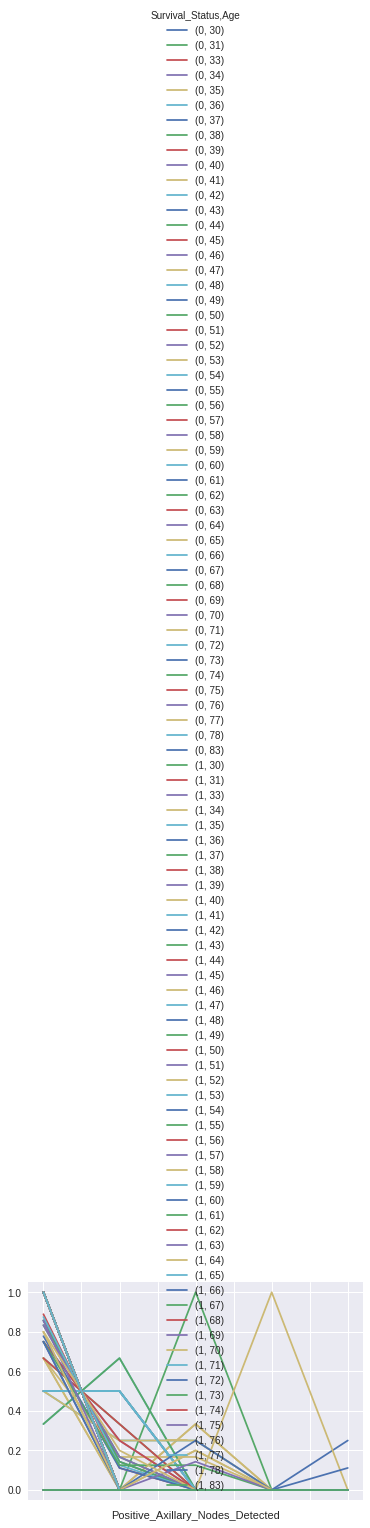

In [152]:
ct.plot()

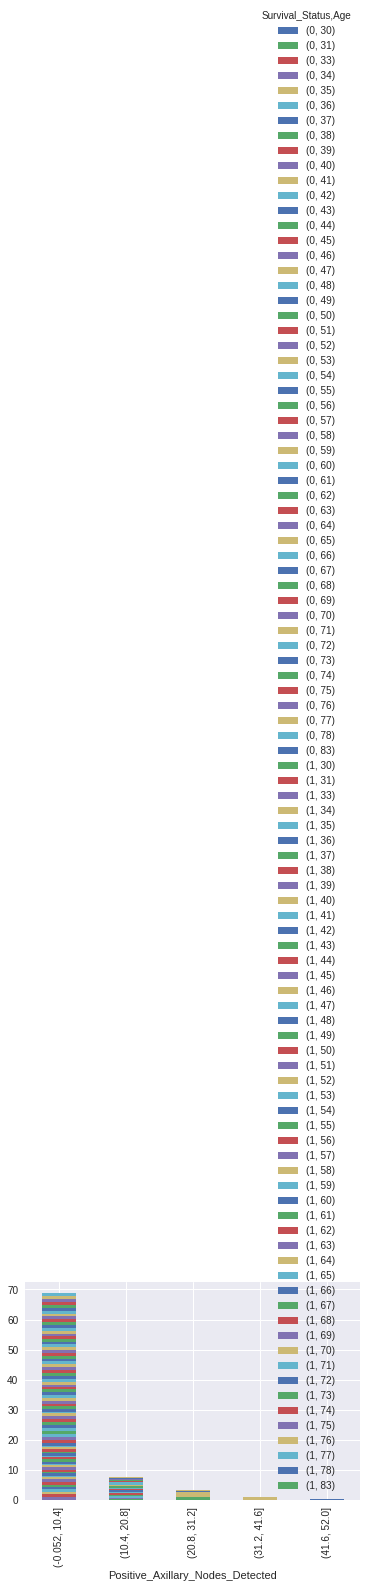

In [153]:
ct.plot(kind='bar', stacked=True);

In [154]:
ct2 = pd.crosstab(patient_data['Survival_Status'], [patient_data['Age'], node_bins],
                  normalize='columns')
ct2

Age                                          30                            \
Positive_Axillary_Nodes_Detected (-0.052, 10.4] (10.4, 20.8] (20.8, 31.2]   
Survival_Status                                                             
0                                           0.0          0.0          0.0   
1                                           1.0          0.0          0.0   

Age                                                                    31  \
Positive_Axillary_Nodes_Detected (31.2, 41.6] (41.6, 52.0] (-0.052, 10.4]   
Survival_Status                                                             
0                                         0.0          0.0            0.0   
1                                         0.0          0.0            1.0   

Age                                                                      \
Positive_Axillary_Nodes_Detected (10.4, 20.8] (20.8, 31.2] (31.2, 41.6]   
Survival_Status                                                           
0                                         0.0          0.0          0.0   
1                                         0.0          0.0          0.0   

Age                                               ...                  78  \
Positive_Axillary_Nodes_Detected (41.6, 52.0]     ...      (-0.052, 10.4]   
Survival_Status                                   ...                       
0                                         0.0     ...                 1.0   
1                                         0.0     ...                 0.0   

Age                                                                      \
Positive_Axillary_Nodes_Detected (10.4, 20.8] (20.8, 31.2] (31.2, 41.6]   
Survival_Status                                                           
0                                         0.0          0.0          0.0   
1                                         0.0          0.0          0.0   

Age                                                       83               \
Positive_Axillary_Nodes_Detected (41.6, 52.0] (-0.052, 10.4] (10.4, 20.8]   
Survival_Status                                                             
0                                         0.0            1.0          0.0   
1                                         0.0            0.0          0.0   

Age                                                                      
Positive_Axillary_Nodes_Detected (20.8, 31.2] (31.2, 41.6] (41.6, 52.0]  
Survival_Status                                                          
0                                         0.0          0.0          0.0  
1                                         0.0          0.0          0.0  

[2 rows x 245 columns]

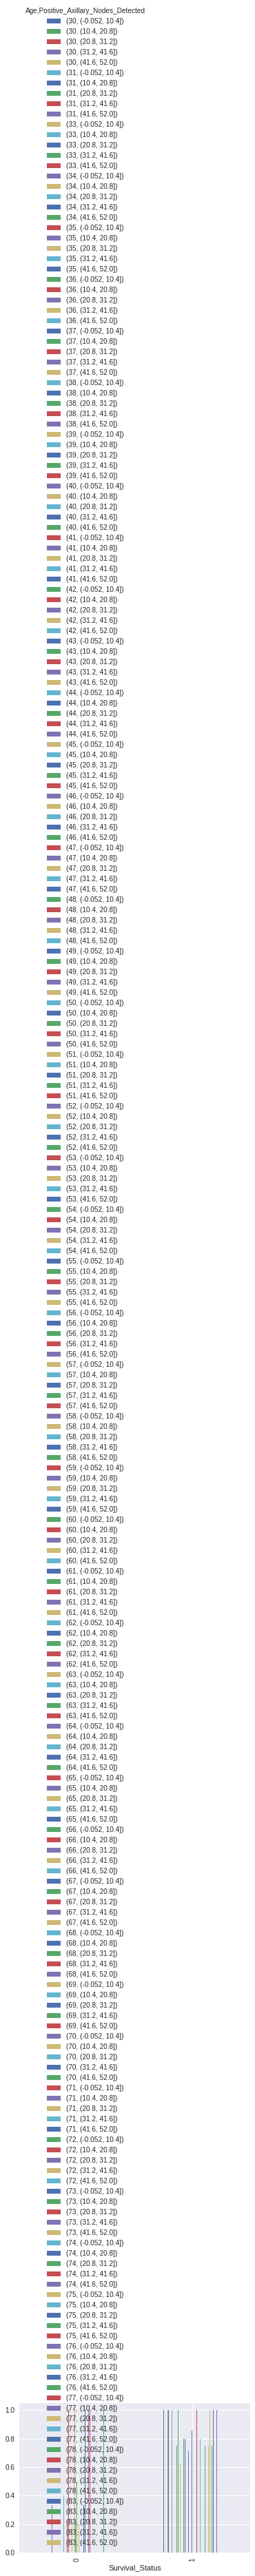

In [155]:
ct2.plot(kind='bar')

ValueError: ignored

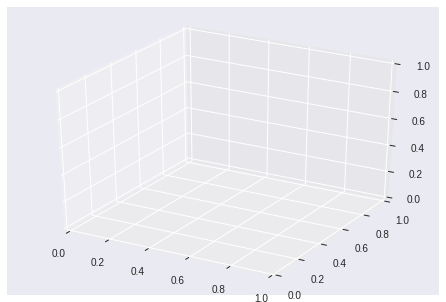

In [156]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data = pd.crosstab(patient_data['Survival_Status'], patient_data['Age'], normalize='columns').values

column_names = ['True','False']
row_names = ['True','False']
fig = plt.figure()
ax = Axes3D(fig)

lx= 2
ly= 2
xpos = np.array([1,0])
ypos = np.array([1,0])
xpos, ypos = np.meshgrid(xpos, ypos)

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(lx*ly)

dx = 0.3 * np.ones_like(zpos)
dy = dx.copy()
dz = data.flatten()

cs = ['r', 'b'] * ly

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=cs)

ax.axes.set_xticks([1,0])
ax.axes.set_yticks([1,0])
ax.set_xlabel('Survival_Status')
ax.set_ylabel('Age')
ax.set_zlabel('patient_data')

plt.show()

In [0]:
#I will need to work on it. It is saying it cannot handle 32 or more arguments directly, I think if split arguments and make it indirect, it will be able to handle the graph

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
### Younger age means less nodes. 
- What is at least one feature that looks to have a negative relationship with survival?
### Older age means more nodes.
- How are those two features related with each other, and what might that mean?
### Comparing the graphs, it seems to me, older age means less likely of survival, and higher node count also means less likely of survival. Meaning a young female with a low node count has a higher chance of survival than a older female with a high node count.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.